In [229]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [230]:
titles = ['random search', 'Bayesian optimization']
param_names = ['gcnv_init_ard_rel_unexplained_variance',
               'gcnv_sample_psi_scale',
               'gcnv_interval_psi_scale',
               'gcnv_log_mean_bias_standard_deviation']
param_lims = [[0.01, 1.0],
              [0.001, 0.1],
              [0.0001, 0.1],
              [0.1, 100.0]]

In [231]:
f1_scores = []
f1_scores.append(np.loadtxt('random_f1_scores.txt'))
f1_scores.append(np.loadtxt('opt_f1_scores.txt'))
params = []
params.append(np.loadtxt('random_params.txt', skiprows=1, usecols=range(1, 5)))
params.append(np.loadtxt('opt_params.txt', skiprows=1, usecols=range(1, 5)))
num_iterations = 25

In [232]:
def make_anim():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots(5, 2, figsize=(16, 8), gridspec_kw = {'height_ratios':[2, 2, 2, 2, 5]})
    for j in range(2):
        for p in range(4):
            ax[p][j].set_title(titles[j] if p == 0 else '', fontsize=18)
            ax[p][j].set_ylim(param_lims[p])
            ax[p][j].set_xlim([1, num_iterations])
            if j == 0:
                ax[p][j].set_ylabel(param_names[p], rotation=0, ha='right')
        ax[4][j].set_xlim([1, num_iterations])
        ax[4][j].set_ylim([0.12, 0.16])
        ax[4][j].set_xlabel('iteration')
        if j == 0:
            ax[4][j].set_ylabel('F1 score', rotation=0, ha='right')
    line, = ax[4][0].plot([], [])
    plt.tight_layout()

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        print(i)
        for j in range(2):
            if i < len(f1_scores[j]):
                for p in range(4):
                    ax[p][j].set_title(titles[j] if p == 0 else '', fontsize=18)
                    ax[p][j].set_ylim(param_lims[p])
                    ax[p][j].set_xlim([1, num_iterations])
                    if j == 0:
                        ax[p][j].set_ylabel(param_names[p], rotation=0, ha='right')
                    ax[p][j].plot(range(1, i + 2), params[j][:i + 1, p], lw=2, c='b', marker='o')
                ax[4][j].plot(range(1, i + 2), f1_scores[j][:i + 1], lw=2, c='b', marker='o')
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=num_iterations, blit=True)
    
    # save the animation as an mp4.  This requires ffmpeg or mencoder to be
    # installed.  The extra_args ensure that the x264 codec is used, so that
    # the video can be embedded in html5.  You may need to adjust this for
    # your system: for more information, see
    # http://matplotlib.sourceforge.net/api/animation_api.html
    mywriter = animation.FFMpegWriter(fps=4)
    anim.save('optimization.mp4', writer=mywriter) #, extra_args=['-vcodec', 'libx264'])
    plt.tight_layout()
    plt.savefig('optimization.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


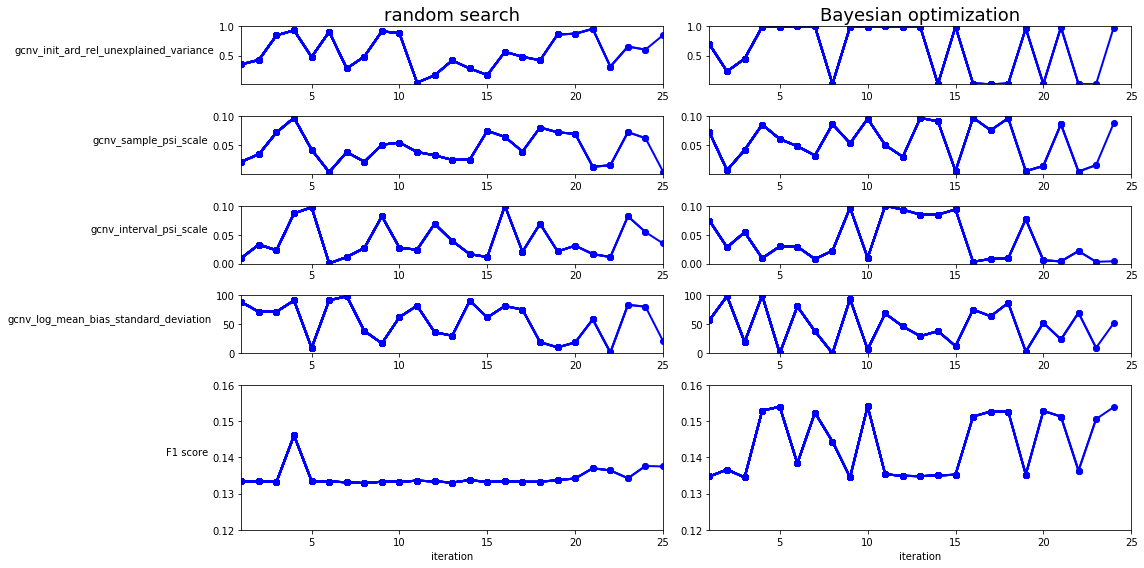

In [233]:
make_anim()